# Modeling: 

## LightGBM Regression

![Modeling](https://user-images.githubusercontent.com/67468718/111879997-1bbd6a80-8966-11eb-92c1-01c38cbdbe4a.JPG)



## Contents<a id='Contents'></a>
 * [1. Introduction](#1_Introduction)
 * [2. Sourcing and Loading](#2_Sourcing_and_Loading)
    * [2.1 Import relevant libraries](#2.1_Import_relevant_libraries)
    * [2.2 Load the data](#2.2_Load_the_data)
 * [3. View and Visualize our dependent variable 'price'](#3._View_and_Visualize_our_dependent_variable_price)
    * [3.1 View the data](#3.1_View_the_data)
    * [3.2 Final Visualization of our dependent Variable 'price'](#3.2_Final_Visualization_of_our_dependent_variable_price)
 * [4. Features Selection: Define/Select Features](#4_Features_Selection:_Define_Select_Features)
 * [5. Train/Test Split](#5_Train/Test_Split)
 * [6. Scaling and Transformation: Standardization](#6_Scaling_and_Transformation:_Standardization)
 * [7. Modeling: LightGBM Regression](#7_LightGBM_Regression)
    * [7.1 Fitting LightGBM Regression](#7.1_Fitting_LightGBM_Regression)
    * [7.2 LightGBM Regression: Residuals Visualization](#7.2_LightGBM_Regression:_Residuals_Visualization)
    * [7.3 LightGBM Regression Model Evaluation](#7.3_LightGBM_Regression_Model_Evaluation)
    * [7.4 Features Selection](#7.4_Features_Selection)
       * [7.4.1 Features Importance](#7.4.1_Features_Importance)
       * [7.4.2 Keeping high important Features Only](#7.4.2_Keeping_high_important_Features_Only) 
       * [7.4.3 Features Selection Summary](#7.4.3_Features_Selection_Summary)    
    * [7.5 Hyperparameters Tuning: RandomizedSearchCV](#7.5_Hyperparameters_Tuning:_RandomizedSearchCV)
       * [7.5.1 RandomizedSearchCV for all features](#7.5.1_RandomizedSearchCV_for_all_features)
       * [7.5.2 Fitting LightGBM Regression after RandomizedSearchCV (All features)](#7.5.2_Fitting_LightGBM_Regression_after_RandomizedSearchCV_(All_features))
       * [7.5.3 RandomizedSearchCV for high important features](#7.5.3_RandomizedSearchCV_for_high_important_features)
       * [7.5.4 Fitting LightGBM Regression after RandomizedSearchCV (high important features)](#7.5.4_Fitting_LightGBM_Regression_after_RandomizedSearchCV_(high_important_features))
 * [8. LightGBM Regression Tuning Summary](#8_LightGBM_Regression_Tuning_Summary)
 * [9. LightGBM Regression Actual vs Prediction Visualization](#9_LightGBM_Regression_Actual_vs_Prediction_Visualization)
 * [10. Models next step](#10_Models_next_step)

## 1. Introduction<a id='1_Introduction'></a>

Here comes the really fun step: modeling! For this step, we'll be:
 * Training multiple Regression algorithms.
 * Apply hyperparameters tuning where applicable to ensure every algorithm will result in best prediction possible.
 * Finally, evaluate these Models.

**Regression Models:**
 * Dummy Regression (Baseline Model)
 * Linear Regression
 * Ridge Regression (L2 Regularization)
 * Lasso Regression (L1 Regularization)
 * Decision Trees
 * Random Forests
 * GB
 * XGBoost
 * Light GBM
 * Artificial Neural networks (ANN).
 * Stacking
 
 
 **In This Notebook, We'll be using LightGBM**



## 2. Sourcing and Loading<a id='2_Sourcing_and_Loading'></a> 

### 2.1 Import relevant libraries<a id='2.1_Import_relevant_libraries'></a> 

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import os 

plt.style.use('ggplot')

print('***Libraries are imported***')

***Libraries are imported***


### 2.2 Load the data<a id='2.2_Load_the_data'></a>

In [ ]:
# Check Current Directory:
os.getcwd()

In [5]:
# Changing the directory:
os.chdir(r"path/Feature_Engineering/datasets")

In [ ]:
#Confirm the directory:
os.getcwd()

In [ ]:
# List files/folders in the cd:
os.listdir()

In [8]:
df = pd.read_csv('pre_processing_df_main_two.csv')

## 3. View and Visualize our dependent variable 'price'<a id='3._View_and_Visualize_our_dependent_variable_price'></a>

### 3.1 View the data<a id='3.1_View_the_data'></a>

In [9]:
#Let's check the df shape:
structure = df.shape
print("Final DataFrame 'df' has Rows:", structure[0], "and Columns: ", structure[1])

Final DataFrame 'df' has Rows: 6002 and Columns:  29


In [10]:
#Let's check the df shape:
df.head()

,property_type,zipcode,beds,baths,sqft,price,lot_size,days_on_market,price_per_sqft,hoa_month,...,university_count,barts,malls,universities,bedBath,AvgRoomSize,cluster_label,median_price_sqft_cluster,gsRating,distance_miles
0,1,94568,3,4,1994,905000,0,80,454,388.0,...,0,1,0,0,12,284.857,205,441.5,8.714286,2.267857
1,0,94568,4,4,3083,1250000,3058,143,405,232.0,...,0,1,0,0,16,385.375,205,441.5,8.714286,2.250000
2,0,94568,4,4,3180,1290000,4477,123,406,232.0,...,0,1,0,0,16,397.500,205,441.5,8.714286,2.227857
3,0,94568,4,2,2069,1105000,2851,21,534,237.0,...,0,1,0,0,8,344.833,205,441.5,8.909091,2.097273
4,2,94568,3,2,1387,725000,5806,51,523,325.0,...,0,1,0,0,6,277.400,274,551.0,7.333333,2.338333


In [11]:
# Summary Statistics:
df.describe()['price'].round(2)

count       6002.00
mean      867244.88
std       380264.13
min       165000.00
25%       579898.75
50%       790000.00
75%      1100000.00
max      1955000.00
Name: price, dtype: float64

### 3.2 Final Visualization of our dependent Variable 'price'<a id='3.2_Final_Visualization_of_our_dependent_variable_price'></a>

C:\Users\aktha\anaconda3\lib\site-packages\ipykernel_launcher.py:8: UserWarning: FixedFormatter should only be used together with FixedLocator
  


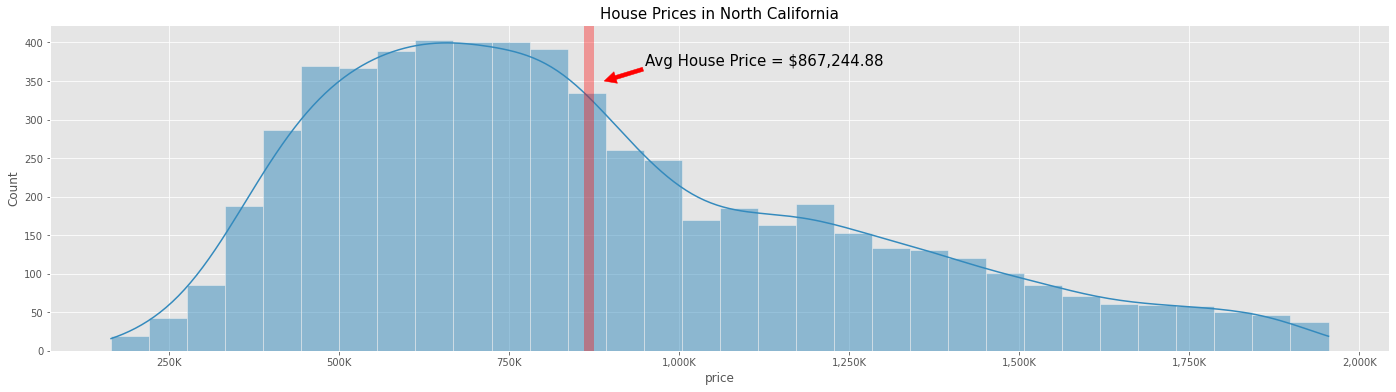

In [12]:
# Making a histogram of the price variable and adding average house sale:
f, ax = plt.subplots(figsize = (24,6))
ax = sns.histplot(x=df['price'], kde=True)
ax.axvline(df['price'].mean(), color='red', ls='-', alpha=0.35, lw=10)
plt.annotate('Avg House Price = $867,244.88', xy=(890000, 350), xytext=(950000, 370), arrowprops={'color':'red'}, fontsize=15)
ax.set_title('House Prices in North California', fontsize=15)
xlabels = ['{:,.0f}'.format(x) + 'K' for x in ax.get_xticks()/1000]
ax.set_xticklabels(xlabels)
plt.grid(True)

## 4. Features Selection: Define/Select Features<a id='4_Features_Selection:_Define/Select_Features'></a>


In [13]:
# let's check our final df columns:
df.columns

Index(['property_type', 'zipcode', 'beds', 'baths', 'sqft', 'price',
       'lot_size', 'days_on_market', 'price_per_sqft', 'hoa_month', 'lat',
       'long', 'property_age', 'school_rating', 'school_count',
       'median_income', 'hotness_score', 'supply_score', 'demand_score',
       'university_count', 'barts', 'malls', 'universities', 'bedBath',
       'AvgRoomSize', 'cluster_label', 'median_price_sqft_cluster', 'gsRating',
       'distance_miles'],
      dtype='object')

In [14]:
# Let's define/select our features:
features = ['property_type', 'zipcode', 'beds', 'baths', 'sqft', 
           'lot_size', 'days_on_market', 'hoa_month', 'lat',
           'long', 'property_age', 'school_rating', 'school_count',
           'median_income', 'hotness_score', 'supply_score', 'demand_score',
           'university_count', 'barts', 'malls', 'universities', 'bedBath',
           'AvgRoomSize', 'cluster_label', 'median_price_sqft_cluster', 'gsRating',
           'distance_miles']



# And, Now let's define X and y:
X = df[features]
y = df.price

## 5. Train/Test Split<a id='5_Train/Test_Split'></a>

Now, let's split our data (X) into training and testing splits, without letting a model learn anything about the test split.

let's have 75/25 Train/Test split

In [15]:
# Import train_test_split
from sklearn.model_selection import train_test_split


# Split into train and test sets:
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.25,
                                                    random_state=1981)

## 6. Scaling and Transformation: Standardization<a id='6_Scaling_and_Transformation:_Standardization'></a>

**Standardization** finds the mean of our data and centers the distribution around it, calculating the number of standard deviations away from the mean each point is. The number of standard deviations are then used as our new values. This centers the data around 0 but technically has no limit to the maximum and minimum values.



In [16]:
# Import StandardScaler:
from sklearn.preprocessing import StandardScaler

# Instantiate StandardScaler:
scaler = StandardScaler()

# Fit & transform  scaler to the data:
X_train = scaler.fit_transform(X_train.astype(np.float))
X_test = scaler.transform(X_test.astype(np.float))


## 7. Modeling: LightGBM Regression<a id='7_LightGBM_Regression'></a>

**LightGBM (Light Gradient Boosting Machine)** is a gradient boosting framework based on decision trees to increases the efficiency of the model and reduces memory usage.

It uses two novel techniques: ***Gradient-based One Side Sampling and Exclusive Feature Bundling (EFB)*** which fulfills the limitations of histogram-based algorithm that is primarily used in all GBDT (Gradient Boosting Decision Tree) frameworks. The two techniques of GOSS and EFB described below form the characteristics of LightGBM Algorithm. They comprise together to make the model work efficiently and provide it a cutting edge over other GBDT frameworks.

Light GBM grows tree vertically while other algorithm grows trees horizontally meaning that Light GBM grows tree leaf-wise while other algorithm grows level-wise. It will choose the leaf with max delta loss to grow. When growing the same leaf, Leaf-wise algorithm can reduce more loss than a level-wise algorithm.

The size of data is increasing day by day and it is becoming difficult for traditional data science algorithms to give faster results. Light GBM is prefixed as ‘Light’ because of its high speed. Light GBM can handle the large size of data and takes lower memory to run. Another reason of why Light GBM is popular is because it focuses on accuracy of results. LGBM also supports GPU learning and thus data scientists are widely using LGBM for data science application development.



### 7.1 Fitting  LightGBM Regression<a id='7.1_Fitting_LightGBM_Regression'></a>


In [17]:
# Import necessary modules
import lightgbm as lgb

# Create a LGBMRegressor: gbm
gbm = lgb.LGBMRegressor(random_state=1981)  

# Fit the regressor to the training data
gbm.fit(X_train, y_train)

# Evaluate the model: R-Squared coefficient
print("R^2 coefficient : {:.4f}".format(gbm.score(X_test, y_test) * 100), '%')

R^2 coefficient : 91.9853 %


In [18]:
# Predict on the test data: y_pred_gbm
y_pred_gbm = gbm.predict(X_test)

### 7.2 LightGBM Regression: Residuals Visualization<a id='7.2_LightGBM_Regression:_Residuals_Visualization'></a>

C:\Users\aktha\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='price', ylabel='Density'>

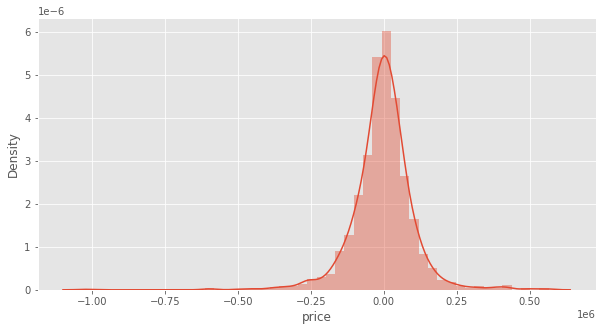

In [19]:
# visualizing residuals
fig = plt.figure(figsize=(10, 5))
residuals = (y_test-y_pred_gbm)
sns.distplot(residuals)

As we can see above by visualizing the residual we can see that is normally distributed which is a good indication that we're having a linear relationship with our dependent variable 'price'.

### 7.3 LightGBM Regression Model Evaluation<a id='7.3_LightGBM_Regression_Model_Evaluation'></a>

In [24]:
# Import necessary modules
from sklearn import metrics

print("********LightGBM Regression Model Evaluation********")
print("-------------------------------------------------")
print("R^2 Score: {:.4f}".format(metrics.r2_score(y_test, y_pred_gbm) * 100), '%')
print("-------------------------------------------------")
print("Adjusted R^2 Score: {:.4f}".format((1 - (1-metrics.r2_score(y_test, y_pred_gbm))*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1))*100), '%')
print("-------------------------------------------------")
print("MAE: {:.4f}".format(metrics.mean_absolute_error(y_test, y_pred_gbm)))
print("-------------------------------------------------")
print("RMSE:{:.4f}".format(np.sqrt(metrics.mean_squared_error(y_test, y_pred_gbm))))
print("-------------------------------------------------")
print("Variance Score:{:.4f}".format( metrics.explained_variance_score(y_test, y_pred_gbm) * 100), '%')
print("-------------------------------------------------")

********LightGBM Regression Model Evaluation********
-------------------------------------------------
R^2 Score: 91.9853 %
-------------------------------------------------
Adjusted R^2 Score: 91.8989 %
-------------------------------------------------
MAE: 70644.4765
-------------------------------------------------
RMSE:106532.6116
-------------------------------------------------
Variance Score:91.9935 %
-------------------------------------------------


As we can see, the value of **root mean squared error (RMSE) is 106,532.6116**, which is slightly higher than 12% of the mean value of the Sales Price i.e.  $867,244.88. 


### 7.4 Features Selection<a id='7.4_Features_Selection'></a>

As shown below let's try to improve predictions by keeping high importants features only: 

#### 7.4.1 Features Importance<a id='7.4.1_Features_Importance'></a> 


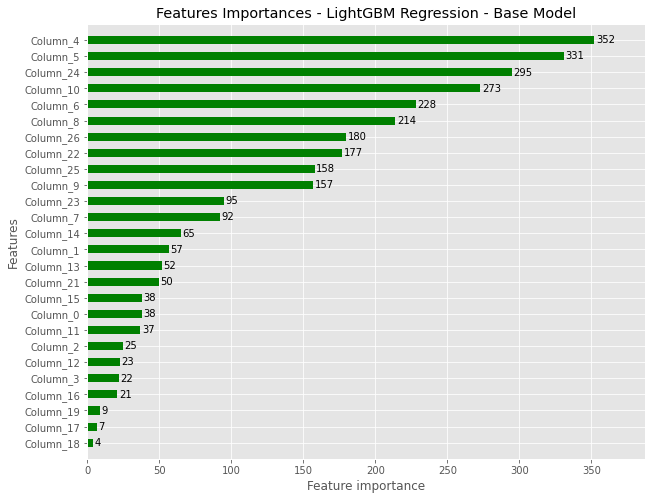

In [25]:
ax = lgb.plot_importance(gbm, max_num_features=30, figsize=(10,8), height=0.5, color='g')
plt.title('Features Importances - LightGBM Regression - Base Model')
plt.show()

**Dropping Features:**
based on above Features importance, let's keep only 'property_type',  'beds', 'baths', 'sqft', 'zipcode', 'lot_size', 'days_on_market', 'hoa_month', 'lat',
'long', 'property_age', 'gsRating','median_income' and 'university_count', 'malls','median_price_sqft_cluster'.

 
#### 7.4.2 Keeping high important Features Only<a id='7.4.2_Keeping_high_important_Features_Only'></a> 

In [26]:
# So Now, Let's re define/select our features and keep only high Coefficients:
features = ['property_type',  'beds', 'baths', 'sqft', 'zipcode',
            'lot_size', 'days_on_market', 'hoa_month', 'lat',
            'long', 'property_age', 'gsRating','median_income',
            'university_count', 'malls','median_price_sqft_cluster'] 

# And, Now let's define X and y:
X = df[features]
y = df.price

In [27]:
# Import train_test_split
from sklearn.model_selection import train_test_split


# Split into train and test sets:
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.25,
                                                    random_state=1981)

# Import StandardScaler:
from sklearn.preprocessing import StandardScaler

# Instantiate StandardScaler:
scaler = StandardScaler()

# Fit & transform  scaler to the data:
X_train = scaler.fit_transform(X_train.astype(np.float))
X_test = scaler.transform(X_test.astype(np.float))

In [28]:
# Create a LGBMRegressor: gbm_2
gbm_2 = lgb.LGBMRegressor(random_state=1981)  

# Fit the regressor to the training data
gbm_2.fit(X_train, y_train)

# Evaluate the model: R-Squared coefficient
print("R^2 coefficient : {:.4f}".format(gbm_2.score(X_test, y_test) * 100), '%')

# Predict on the test data: y_pred_gbm_2
y_pred_gbm_2 = gbm_2.predict(X_test)

R^2 coefficient : 92.2960 %


In [29]:
print("********Tuned LightGBM Regression Model Evaluation********")
print("-------------------------------------------------")
print("R^2 Score: {:.4f}".format(metrics.r2_score(y_test, y_pred_gbm_2) * 100), '%')
print("-------------------------------------------------")
print("Adjusted R^2 Score: {:.4f}".format((1 - (1-metrics.r2_score(y_test, y_pred_gbm_2))*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1))*100), '%')
print("-------------------------------------------------")
print("MAE: {:.4f}".format(metrics.mean_absolute_error(y_test, y_pred_gbm_2)))
print("-------------------------------------------------")
print("RMSE:{:.4f}".format(np.sqrt(metrics.mean_squared_error(y_test, y_pred_gbm_2))))
print("-------------------------------------------------")
print("Variance Score:{:.4f}".format( metrics.explained_variance_score(y_test, y_pred_gbm_2) * 100), '%')
print("-------------------------------------------------")

********Tuned LightGBM Regression Model Evaluation********
-------------------------------------------------
R^2 Score: 92.2960 %
-------------------------------------------------
Adjusted R^2 Score: 92.2129 %
-------------------------------------------------
MAE: 70316.6721
-------------------------------------------------
RMSE:104447.5214
-------------------------------------------------
Variance Score:92.3067 %
-------------------------------------------------


#### 7.4.3 Features Selection Summary<a id='7.4.3_Features_Selection_Summary'></a>

As we can see below, when we're keeping the high important features: we're seeing the best Result for LightGBM Regression:

|Features Selection| R^2 Score|Adjusted R^2 Score  |  MAE  | RMSE|Variance Score|
|:----------------------|:-------:|:-------:|:----:|:----:|:----:|
|Baseline (all features)|91.9853 %|91.8384 %|70644.4765|106532.6116|91.9935 %|
|Baseline (Keeping high important Features)    |92.2960 %|92.2129 %|70316.6721|104447.5214|92.3067 %|


### 7.5 Hyperparameters Tuning: RandomizedSearchCV<a id='7.5_Hyperparameters_Tuning:_RandomizedSearchCV'></a>

#### 7.5.1 RandomizedSearchCV for all features:<a id='7.5.1_RandomizedSearchCV_for_all_features'></a>

In [30]:
# Let's define/select our features:
features = ['property_type', 'zipcode', 'beds', 'baths', 'sqft', 
           'lot_size', 'days_on_market', 'hoa_month', 'lat',
           'long', 'property_age', 'school_rating', 'school_count',
           'median_income', 'hotness_score', 'supply_score', 'demand_score',
           'university_count', 'barts', 'malls', 'universities', 'bedBath',
           'AvgRoomSize', 'cluster_label', 'median_price_sqft_cluster', 'gsRating',
           'distance_miles']

# And, Now let's define X and y:
X = df[features]
y = df.price

# Import train_test_split
from sklearn.model_selection import train_test_split


# Split into train and test sets:
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.25,
                                                    random_state=1981)

# Import StandardScaler:
from sklearn.preprocessing import StandardScaler

# Instantiate StandardScaler:
scaler = StandardScaler()

# Fit & transform  scaler to the data:
X_train = scaler.fit_transform(X_train.astype(np.float))
X_test = scaler.transform(X_test.astype(np.float))




In [36]:
# Import necessary modules
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV


n_estimators = [10, 50, 100, 500, 1000, 5000]
#max_depth = [-1, 5, 7, 9, 11, 13, 15, 18, 20, 25] #default = -1
#num_leaves = range(50, 300, 25)
learning_rate = [0.01, 0.05, 0.07, 0.1, 0.3, 0.5, 0.7 , 1] #default 0.1
boosting_type = ['gbdt', 'dart', 'goss'] # default = 'gbdt'
colsample_bytree = [0.6, 0.7, 0.8, 0.9] #default = 1.0
reg_alpha = [0, 0.2, 0.4, 0.6, 0.8, 1] # defualt 0
reg_lambda = [0, 0.2, 0.4, 0.6, 0.8, 1] # defualt 0



# Set the parameters by cross-validation
#params = [{'n_estimators': n_est,'max_depth': max_depth,'learning_rate': lr }]

params = [{#'max_depth': max_depth,
           #'num_leaves': num_leaves,
           'learning_rate': learning_rate,
           'reg_alpha': reg_alpha,
           'reg_lambda':reg_lambda,
           'boosting_type': boosting_type,
           'colsample_bytree': colsample_bytree,
           'n_estimators': n_estimators}]

# Create a LGBMRegressor: gbm_search_1
gbm_search_1 = lgb.LGBMRegressor(random_state=1981)  

#cross validation
folds = 3

# Setup the RandomizedSearchCV object: gbm_cv_all
gbm_cv_all = RandomizedSearchCV(estimator = gbm_search_1, 
                               param_distributions = params, 
                               scoring= 'neg_mean_squared_error', 
                               n_iter = 200, cv = folds, n_jobs=1,
                               return_train_score=True, verbose = 2)   

# Fit it to the training data
gbm_cv_all.fit(X_train, y_train)

Fitting 3 folds for each of 200 candidates, totalling 600 fits
[CV] END boosting_type=gbdt, colsample_bytree=0.6, learning_rate=0.01, n_estimators=1000, reg_alpha=0.6, reg_lambda=0.4; total time=   0.9s
[CV] END boosting_type=gbdt, colsample_bytree=0.6, learning_rate=0.01, n_estimators=1000, reg_alpha=0.6, reg_lambda=0.4; total time=   0.9s
[CV] END boosting_type=gbdt, colsample_bytree=0.6, learning_rate=0.01, n_estimators=1000, reg_alpha=0.6, reg_lambda=0.4; total time=   1.0s
[CV] END boosting_type=goss, colsample_bytree=0.7, learning_rate=0.07, n_estimators=1000, reg_alpha=0.4, reg_lambda=0.6; total time=   1.1s
[CV] END boosting_type=goss, colsample_bytree=0.7, learning_rate=0.07, n_estimators=1000, reg_alpha=0.4, reg_lambda=0.6; total time=   1.1s
[CV] END boosting_type=goss, colsample_bytree=0.7, learning_rate=0.07, n_estimators=1000, reg_alpha=0.4, reg_lambda=0.6; total time=   1.8s
[CV] END boosting_type=gbdt, colsample_bytree=0.8, learning_rate=0.1, n_estimators=500, reg_alpha

[CV] END boosting_type=gbdt, colsample_bytree=0.7, learning_rate=0.1, n_estimators=5000, reg_alpha=0.6, reg_lambda=0.2; total time=   8.6s
[CV] END boosting_type=gbdt, colsample_bytree=0.7, learning_rate=0.1, n_estimators=5000, reg_alpha=0.6, reg_lambda=0.2; total time=   8.1s
[CV] END boosting_type=gbdt, colsample_bytree=0.7, learning_rate=0.1, n_estimators=5000, reg_alpha=0.6, reg_lambda=0.2; total time=   8.7s
[CV] END boosting_type=goss, colsample_bytree=0.9, learning_rate=0.7, n_estimators=500, reg_alpha=0.2, reg_lambda=0.4; total time=   0.8s
[CV] END boosting_type=goss, colsample_bytree=0.9, learning_rate=0.7, n_estimators=500, reg_alpha=0.2, reg_lambda=0.4; total time=   0.9s
[CV] END boosting_type=goss, colsample_bytree=0.9, learning_rate=0.7, n_estimators=500, reg_alpha=0.2, reg_lambda=0.4; total time=   0.9s
[CV] END boosting_type=dart, colsample_bytree=0.9, learning_rate=0.7, n_estimators=100, reg_alpha=0.6, reg_lambda=0.2; total time=   0.2s
[CV] END boosting_type=dart, co

[CV] END boosting_type=dart, colsample_bytree=0.8, learning_rate=0.3, n_estimators=5000, reg_alpha=0.2, reg_lambda=0.2; total time=  36.3s
[CV] END boosting_type=dart, colsample_bytree=0.8, learning_rate=0.3, n_estimators=5000, reg_alpha=0.2, reg_lambda=0.2; total time=  35.6s
[CV] END boosting_type=dart, colsample_bytree=0.8, learning_rate=0.3, n_estimators=5000, reg_alpha=0.2, reg_lambda=0.2; total time=  35.6s
[CV] END boosting_type=dart, colsample_bytree=0.8, learning_rate=1, n_estimators=10, reg_alpha=1, reg_lambda=1; total time=   0.0s
[CV] END boosting_type=dart, colsample_bytree=0.8, learning_rate=1, n_estimators=10, reg_alpha=1, reg_lambda=1; total time=   0.0s
[CV] END boosting_type=dart, colsample_bytree=0.8, learning_rate=1, n_estimators=10, reg_alpha=1, reg_lambda=1; total time=   0.0s
[CV] END boosting_type=goss, colsample_bytree=0.7, learning_rate=0.7, n_estimators=5000, reg_alpha=0, reg_lambda=0; total time=   8.1s
[CV] END boosting_type=goss, colsample_bytree=0.7, lear

[CV] END boosting_type=dart, colsample_bytree=0.7, learning_rate=0.5, n_estimators=5000, reg_alpha=0.8, reg_lambda=0.6; total time= 1.1min
[CV] END boosting_type=dart, colsample_bytree=0.7, learning_rate=0.5, n_estimators=5000, reg_alpha=0.8, reg_lambda=0.6; total time= 1.2min
[CV] END boosting_type=dart, colsample_bytree=0.8, learning_rate=0.05, n_estimators=50, reg_alpha=0.6, reg_lambda=0; total time=   0.1s
[CV] END boosting_type=dart, colsample_bytree=0.8, learning_rate=0.05, n_estimators=50, reg_alpha=0.6, reg_lambda=0; total time=   0.1s
[CV] END boosting_type=dart, colsample_bytree=0.8, learning_rate=0.05, n_estimators=50, reg_alpha=0.6, reg_lambda=0; total time=   0.3s
[CV] END boosting_type=dart, colsample_bytree=0.7, learning_rate=0.3, n_estimators=5000, reg_alpha=1, reg_lambda=0.8; total time=  55.6s
[CV] END boosting_type=dart, colsample_bytree=0.7, learning_rate=0.3, n_estimators=5000, reg_alpha=1, reg_lambda=0.8; total time=  55.9s
[CV] END boosting_type=dart, colsample_b

[CV] END boosting_type=dart, colsample_bytree=0.8, learning_rate=0.5, n_estimators=500, reg_alpha=0.4, reg_lambda=0.8; total time=   4.2s
[CV] END boosting_type=dart, colsample_bytree=0.8, learning_rate=0.5, n_estimators=500, reg_alpha=0.4, reg_lambda=0.8; total time=   3.5s
[CV] END boosting_type=dart, colsample_bytree=0.9, learning_rate=1, n_estimators=100, reg_alpha=0.6, reg_lambda=0.8; total time=   0.2s
[CV] END boosting_type=dart, colsample_bytree=0.9, learning_rate=1, n_estimators=100, reg_alpha=0.6, reg_lambda=0.8; total time=   0.2s
[CV] END boosting_type=dart, colsample_bytree=0.9, learning_rate=1, n_estimators=100, reg_alpha=0.6, reg_lambda=0.8; total time=   0.3s
[CV] END boosting_type=goss, colsample_bytree=0.7, learning_rate=0.01, n_estimators=1000, reg_alpha=1, reg_lambda=0.4; total time=   3.7s
[CV] END boosting_type=goss, colsample_bytree=0.7, learning_rate=0.01, n_estimators=1000, reg_alpha=1, reg_lambda=0.4; total time=   5.2s
[CV] END boosting_type=goss, colsample_b

[CV] END boosting_type=goss, colsample_bytree=0.6, learning_rate=0.07, n_estimators=5000, reg_alpha=0, reg_lambda=0; total time=  11.7s
[CV] END boosting_type=goss, colsample_bytree=0.6, learning_rate=0.07, n_estimators=5000, reg_alpha=0, reg_lambda=0; total time=  10.4s
[CV] END boosting_type=dart, colsample_bytree=0.9, learning_rate=0.01, n_estimators=1000, reg_alpha=0.6, reg_lambda=0.4; total time=   6.8s
[CV] END boosting_type=dart, colsample_bytree=0.9, learning_rate=0.01, n_estimators=1000, reg_alpha=0.6, reg_lambda=0.4; total time=   7.7s
[CV] END boosting_type=dart, colsample_bytree=0.9, learning_rate=0.01, n_estimators=1000, reg_alpha=0.6, reg_lambda=0.4; total time=   6.6s
[CV] END boosting_type=goss, colsample_bytree=0.9, learning_rate=1, n_estimators=100, reg_alpha=0.4, reg_lambda=0.6; total time=   0.1s
[CV] END boosting_type=goss, colsample_bytree=0.9, learning_rate=1, n_estimators=100, reg_alpha=0.4, reg_lambda=0.6; total time=   0.1s
[CV] END boosting_type=goss, colsamp

[CV] END boosting_type=gbdt, colsample_bytree=0.8, learning_rate=1, n_estimators=100, reg_alpha=0, reg_lambda=0.4; total time=   0.1s
[CV] END boosting_type=gbdt, colsample_bytree=0.8, learning_rate=1, n_estimators=100, reg_alpha=0, reg_lambda=0.4; total time=   0.1s
[CV] END boosting_type=gbdt, colsample_bytree=0.8, learning_rate=1, n_estimators=100, reg_alpha=0, reg_lambda=0.4; total time=   0.1s
[CV] END boosting_type=dart, colsample_bytree=0.8, learning_rate=0.1, n_estimators=1000, reg_alpha=0.2, reg_lambda=0.4; total time=   6.2s
[CV] END boosting_type=dart, colsample_bytree=0.8, learning_rate=0.1, n_estimators=1000, reg_alpha=0.2, reg_lambda=0.4; total time=   7.7s
[CV] END boosting_type=dart, colsample_bytree=0.8, learning_rate=0.1, n_estimators=1000, reg_alpha=0.2, reg_lambda=0.4; total time=   6.5s
[CV] END boosting_type=dart, colsample_bytree=0.8, learning_rate=0.1, n_estimators=10, reg_alpha=0, reg_lambda=1; total time=   0.0s
[CV] END boosting_type=dart, colsample_bytree=0.

[CV] END boosting_type=gbdt, colsample_bytree=0.8, learning_rate=0.1, n_estimators=50, reg_alpha=0.4, reg_lambda=0.2; total time=   0.1s
[CV] END boosting_type=gbdt, colsample_bytree=0.8, learning_rate=0.1, n_estimators=50, reg_alpha=0.4, reg_lambda=0.2; total time=   0.1s
[CV] END boosting_type=dart, colsample_bytree=0.7, learning_rate=0.7, n_estimators=1000, reg_alpha=0.2, reg_lambda=0.2; total time=   8.1s
[CV] END boosting_type=dart, colsample_bytree=0.7, learning_rate=0.7, n_estimators=1000, reg_alpha=0.2, reg_lambda=0.2; total time=   6.6s
[CV] END boosting_type=dart, colsample_bytree=0.7, learning_rate=0.7, n_estimators=1000, reg_alpha=0.2, reg_lambda=0.2; total time=   7.5s
[CV] END boosting_type=dart, colsample_bytree=0.7, learning_rate=0.07, n_estimators=50, reg_alpha=0.2, reg_lambda=0.6; total time=   0.0s
[CV] END boosting_type=dart, colsample_bytree=0.7, learning_rate=0.07, n_estimators=50, reg_alpha=0.2, reg_lambda=0.6; total time=   0.0s
[CV] END boosting_type=dart, cols

[CV] END boosting_type=goss, colsample_bytree=0.8, learning_rate=0.07, n_estimators=100, reg_alpha=0.8, reg_lambda=0.6; total time=   0.2s
[CV] END boosting_type=goss, colsample_bytree=0.8, learning_rate=0.07, n_estimators=100, reg_alpha=0.8, reg_lambda=0.6; total time=   0.2s
[CV] END boosting_type=gbdt, colsample_bytree=0.9, learning_rate=0.7, n_estimators=50, reg_alpha=0.4, reg_lambda=0.8; total time=   0.0s
[CV] END boosting_type=gbdt, colsample_bytree=0.9, learning_rate=0.7, n_estimators=50, reg_alpha=0.4, reg_lambda=0.8; total time=   0.1s
[CV] END boosting_type=gbdt, colsample_bytree=0.9, learning_rate=0.7, n_estimators=50, reg_alpha=0.4, reg_lambda=0.8; total time=   0.1s
[CV] END boosting_type=gbdt, colsample_bytree=0.7, learning_rate=0.01, n_estimators=1000, reg_alpha=0, reg_lambda=0.6; total time=   2.0s
[CV] END boosting_type=gbdt, colsample_bytree=0.7, learning_rate=0.01, n_estimators=1000, reg_alpha=0, reg_lambda=0.6; total time=   1.8s
[CV] END boosting_type=gbdt, colsam

[CV] END boosting_type=dart, colsample_bytree=0.9, learning_rate=0.05, n_estimators=5000, reg_alpha=0.8, reg_lambda=0.2; total time=  40.8s
[CV] END boosting_type=dart, colsample_bytree=0.9, learning_rate=0.05, n_estimators=5000, reg_alpha=0.8, reg_lambda=0.2; total time=  39.8s
[CV] END boosting_type=dart, colsample_bytree=0.8, learning_rate=0.1, n_estimators=10, reg_alpha=0.4, reg_lambda=0; total time=   0.0s
[CV] END boosting_type=dart, colsample_bytree=0.8, learning_rate=0.1, n_estimators=10, reg_alpha=0.4, reg_lambda=0; total time=   0.0s
[CV] END boosting_type=dart, colsample_bytree=0.8, learning_rate=0.1, n_estimators=10, reg_alpha=0.4, reg_lambda=0; total time=   0.0s
[CV] END boosting_type=goss, colsample_bytree=0.7, learning_rate=1, n_estimators=50, reg_alpha=1, reg_lambda=0.8; total time=   0.1s
[CV] END boosting_type=goss, colsample_bytree=0.7, learning_rate=1, n_estimators=50, reg_alpha=1, reg_lambda=0.8; total time=   0.1s
[CV] END boosting_type=goss, colsample_bytree=0.7

RandomizedSearchCV(cv=3, estimator=LGBMRegressor(random_state=1981), n_iter=200,
                   n_jobs=1,
                   param_distributions=[{'boosting_type': ['gbdt', 'dart',
                                                           'goss'],
                                         'colsample_bytree': [0.6, 0.7, 0.8,
                                                              0.9],
                                         'learning_rate': [0.01, 0.05, 0.07,
                                                           0.1, 0.3, 0.5, 0.7,
                                                           1],
                                         'n_estimators': [10, 50, 100, 500,
                                                          1000, 5000],
                                         'reg_alpha': [0, 0.2, 0.4, 0.6, 0.8,
                                                       1],
                                         'reg_lambda': [0, 0.2, 0.4, 0.6, 0.8,
                    

In [37]:
#checking the value of optimum number of parameters
print("Tuned LightGBM Regression Parameters: {}".format(gbm_cv_all.best_params_))
print("Tuned LightGBM - Best neg_mean_squared_error is {}".format(gbm_cv_all.best_score_))

Tuned LightGBM Regression Parameters: {'reg_lambda': 0.4, 'reg_alpha': 0.6, 'n_estimators': 1000, 'learning_rate': 0.01, 'colsample_bytree': 0.6, 'boosting_type': 'gbdt'}
Tuned LightGBM - Best neg_mean_squared_error is -12034126021.213125


In [ ]:
cv_results = pd.DataFrame(xgb_cv_all.cv_results_)
cv_results

#### 7.5.2 Fitting LightGBM Regression after RandomizedSearchCV (All features)<a id='7.5.2_Fitting_LightGBM_Regression_after_RandomizedSearchCV_(All_features)'></a>

In [32]:
#(Best RandomizedSearchCV)

n_estimators = 1700
learning_rate = 0.01
reg_lambda = 0.4
reg_alpha = 0.6
boosting_type = 'gbdt'
colsample_bytree = 0.6
max_depth = 15
num_leaves= 32767 # Always num_leaves = 2^max_depth-1 AND <= (131072)

# Create a LGBMRegressor: gbm_tuned_cv_1
gbm_tuned_cv_1 = lgb.LGBMRegressor(n_estimators = n_estimators,
                                   learning_rate = learning_rate,
                                   reg_lambda=reg_lambda,
                                   reg_alpha=reg_alpha,
                                   boosting_type=boosting_type, 
                                   colsample_bytree=colsample_bytree,
                                   max_depth= max_depth,
                                   num_leaves=num_leaves,
                                   random_state=1981)

# Fit the regressor to the training data
gbm_tuned_cv_1.fit(X_train, y_train)

# Evaluate the model: R-Squared coefficient
print("R^2 coefficient Tuned_final : {:.4f}".format(gbm_tuned_cv_1.score(X_test, y_test) * 100), '%')


# Predict on the test data: y_pred_gbm_cv_1
y_pred_gbm_cv_1 = gbm_tuned_cv_1.predict(X_test)


R^2 coefficient Tuned_final : 92.5526 %


In [33]:
from sklearn import metrics
print("********Tuned LightGBM Regression Model Evaluation********")
print("-------------------------------------------------")
print("R^2 Score: {:.4f}".format(metrics.r2_score(y_test, y_pred_gbm_cv_1) * 100), '%')
print("-------------------------------------------------")
print("Adjusted R^2 Score: {:.4f}".format((1 - (1-metrics.r2_score(y_test, y_pred_gbm_cv_1))*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1))*100), '%')
print("-------------------------------------------------")
print("MAE: {:.4f}".format(metrics.mean_absolute_error(y_test, y_pred_gbm_cv_1)))
print("-------------------------------------------------")
print("RMSE:{:.4f}".format(np.sqrt(metrics.mean_squared_error(y_test, y_pred_gbm_cv_1))))
print("-------------------------------------------------")
print("Variance Score:{:.4f}".format( metrics.explained_variance_score(y_test, y_pred_gbm_cv_1) * 100), '%')
print("-------------------------------------------------")

********Tuned LightGBM Regression Model Evaluation********
-------------------------------------------------
R^2 Score: 92.5526 %
-------------------------------------------------
Adjusted R^2 Score: 92.4160 %
-------------------------------------------------
MAE: 66041.6874
-------------------------------------------------
RMSE:102693.4526
-------------------------------------------------
Variance Score:92.5621 %
-------------------------------------------------


#### 7.5.3 RandomizedSearchCV for high important features<a id='7.5.3_RandomizedSearchCV_for_high_important_features'></a> 

In [34]:
# Let's define/select our features:
features = ['property_type',  'beds', 'baths', 'sqft', 'zipcode',
            'lot_size', 'days_on_market', 'hoa_month', 'lat',
            'long', 'property_age', 'gsRating','median_income',
            'university_count', 'malls','median_price_sqft_cluster'] 

# And, Now let's define X and y:
X = df[features]
y = df.price

# Import train_test_split
from sklearn.model_selection import train_test_split


# Split into train and test sets:
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.25,
                                                    random_state=1981)

# Import StandardScaler:
from sklearn.preprocessing import StandardScaler

# Instantiate StandardScaler:
scaler = StandardScaler()

# Fit & transform  scaler to the data:
X_train = scaler.fit_transform(X_train.astype(np.float))
X_test = scaler.transform(X_test.astype(np.float))


In [36]:
# Import necessary modules
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

n_estimators = [10, 50, 100, 500, 1000, 5000]
#max_depth = [-1, 5, 7, 9, 11, 13, 15, 18, 20, 25] #default = -1
#num_leaves = range(50, 300, 25)
learning_rate = [0.01, 0.05, 0.07, 0.1, 0.3, 0.5, 0.7 , 1] #default 0.1
boosting_type = ['gbdt', 'dart', 'goss'] # default = 'gbdt'
colsample_bytree = [0.6, 0.7, 0.8, 0.9] #default = 1.0
reg_alpha = [0, 0.2, 0.4, 0.6, 0.8, 1] # defualt 0
reg_lambda = [0, 0.2, 0.4, 0.6, 0.8, 1] # defualt 0



# Set the parameters by cross-validation
#params = [{'n_estimators': n_est,'max_depth': max_depth,'learning_rate': lr }]

params = [{#'max_depth': max_depth,
           #'num_leaves': num_leaves,
           'learning_rate': learning_rate,
           'reg_alpha': reg_alpha,
           'reg_lambda':reg_lambda,
           'boosting_type': boosting_type,
           'colsample_bytree': colsample_bytree,
           'n_estimators': n_estimators}]

# Create a LGBMRegressor: gbm_search_2
gbm_search_2 = lgb.LGBMRegressor(random_state=1981)  

#cross validation
folds = 3

# Setup the RandomizedSearchCV object: gbm_cv_2
gbm_cv_2 = RandomizedSearchCV(estimator = gbm_search_2, 
                               param_distributions = params, 
                               scoring= 'neg_mean_squared_error', 
                               n_iter = 200, cv = folds, n_jobs=1,
                               return_train_score=True, verbose = 2)   

# Fit it to the training data
gbm_cv_2.fit(X_train, y_train)

Fitting 3 folds for each of 200 candidates, totalling 600 fits
[CV] END boosting_type=goss, colsample_bytree=0.6, learning_rate=0.07, n_estimators=10, reg_alpha=0.2, reg_lambda=0.2; total time=   0.0s
[CV] END boosting_type=goss, colsample_bytree=0.6, learning_rate=0.07, n_estimators=10, reg_alpha=0.2, reg_lambda=0.2; total time=   0.0s
[CV] END boosting_type=goss, colsample_bytree=0.6, learning_rate=0.07, n_estimators=10, reg_alpha=0.2, reg_lambda=0.2; total time=   0.0s
[CV] END boosting_type=dart, colsample_bytree=0.8, learning_rate=0.7, n_estimators=100, reg_alpha=0.4, reg_lambda=0.4; total time=   0.0s
[CV] END boosting_type=dart, colsample_bytree=0.8, learning_rate=0.7, n_estimators=100, reg_alpha=0.4, reg_lambda=0.4; total time=   0.0s
[CV] END boosting_type=dart, colsample_bytree=0.8, learning_rate=0.7, n_estimators=100, reg_alpha=0.4, reg_lambda=0.4; total time=   0.0s
[CV] END boosting_type=goss, colsample_bytree=0.8, learning_rate=0.05, n_estimators=500, reg_alpha=1, reg_lam

[CV] END boosting_type=dart, colsample_bytree=0.8, learning_rate=0.1, n_estimators=5000, reg_alpha=0, reg_lambda=0; total time=  22.9s
[CV] END boosting_type=dart, colsample_bytree=0.8, learning_rate=0.1, n_estimators=5000, reg_alpha=0, reg_lambda=0; total time=  23.8s
[CV] END boosting_type=dart, colsample_bytree=0.8, learning_rate=0.1, n_estimators=5000, reg_alpha=0, reg_lambda=0; total time=  27.7s
[CV] END boosting_type=dart, colsample_bytree=0.7, learning_rate=0.01, n_estimators=50, reg_alpha=0, reg_lambda=0; total time=   0.0s
[CV] END boosting_type=dart, colsample_bytree=0.7, learning_rate=0.01, n_estimators=50, reg_alpha=0, reg_lambda=0; total time=   0.0s
[CV] END boosting_type=dart, colsample_bytree=0.7, learning_rate=0.01, n_estimators=50, reg_alpha=0, reg_lambda=0; total time=   0.0s
[CV] END boosting_type=goss, colsample_bytree=0.8, learning_rate=0.01, n_estimators=1000, reg_alpha=0.4, reg_lambda=0.6; total time=   1.4s
[CV] END boosting_type=goss, colsample_bytree=0.8, le

[CV] END boosting_type=goss, colsample_bytree=0.9, learning_rate=0.07, n_estimators=1000, reg_alpha=0.4, reg_lambda=0.4; total time=   1.9s
[CV] END boosting_type=goss, colsample_bytree=0.9, learning_rate=0.07, n_estimators=1000, reg_alpha=0.4, reg_lambda=0.4; total time=   2.1s
[CV] END boosting_type=goss, colsample_bytree=0.9, learning_rate=0.07, n_estimators=1000, reg_alpha=0.4, reg_lambda=0.4; total time=   2.3s
[CV] END boosting_type=goss, colsample_bytree=0.7, learning_rate=0.5, n_estimators=50, reg_alpha=0, reg_lambda=0.8; total time=   0.0s
[CV] END boosting_type=goss, colsample_bytree=0.7, learning_rate=0.5, n_estimators=50, reg_alpha=0, reg_lambda=0.8; total time=   0.0s
[CV] END boosting_type=goss, colsample_bytree=0.7, learning_rate=0.5, n_estimators=50, reg_alpha=0, reg_lambda=0.8; total time=   0.0s
[CV] END boosting_type=goss, colsample_bytree=0.9, learning_rate=0.3, n_estimators=5000, reg_alpha=0.8, reg_lambda=0.2; total time=   9.9s
[CV] END boosting_type=goss, colsamp

[CV] END boosting_type=goss, colsample_bytree=0.7, learning_rate=0.05, n_estimators=1000, reg_alpha=0, reg_lambda=0.8; total time=   1.7s
[CV] END boosting_type=goss, colsample_bytree=0.7, learning_rate=0.05, n_estimators=1000, reg_alpha=0, reg_lambda=0.8; total time=   1.2s
[CV] END boosting_type=goss, colsample_bytree=0.7, learning_rate=0.05, n_estimators=1000, reg_alpha=0, reg_lambda=0.8; total time=   1.2s
[CV] END boosting_type=dart, colsample_bytree=0.6, learning_rate=0.3, n_estimators=50, reg_alpha=0, reg_lambda=0.8; total time=   0.0s
[CV] END boosting_type=dart, colsample_bytree=0.6, learning_rate=0.3, n_estimators=50, reg_alpha=0, reg_lambda=0.8; total time=   0.0s
[CV] END boosting_type=dart, colsample_bytree=0.6, learning_rate=0.3, n_estimators=50, reg_alpha=0, reg_lambda=0.8; total time=   0.0s
[CV] END boosting_type=dart, colsample_bytree=0.7, learning_rate=0.05, n_estimators=50, reg_alpha=0.2, reg_lambda=0; total time=   0.0s
[CV] END boosting_type=dart, colsample_bytree

[CV] END boosting_type=dart, colsample_bytree=0.8, learning_rate=0.01, n_estimators=5000, reg_alpha=0.6, reg_lambda=0.2; total time=  35.8s
[CV] END boosting_type=dart, colsample_bytree=0.8, learning_rate=0.01, n_estimators=5000, reg_alpha=0.6, reg_lambda=0.2; total time=  50.2s
[CV] END boosting_type=dart, colsample_bytree=0.8, learning_rate=0.01, n_estimators=5000, reg_alpha=0.6, reg_lambda=0.2; total time= 1.0min
[CV] END boosting_type=gbdt, colsample_bytree=0.7, learning_rate=0.7, n_estimators=10, reg_alpha=0, reg_lambda=1; total time=   0.0s
[CV] END boosting_type=gbdt, colsample_bytree=0.7, learning_rate=0.7, n_estimators=10, reg_alpha=0, reg_lambda=1; total time=   0.0s
[CV] END boosting_type=gbdt, colsample_bytree=0.7, learning_rate=0.7, n_estimators=10, reg_alpha=0, reg_lambda=1; total time=   0.0s
[CV] END boosting_type=dart, colsample_bytree=0.6, learning_rate=0.5, n_estimators=1000, reg_alpha=0.8, reg_lambda=0.4; total time=   8.6s
[CV] END boosting_type=dart, colsample_byt

[CV] END boosting_type=gbdt, colsample_bytree=0.9, learning_rate=0.01, n_estimators=500, reg_alpha=0, reg_lambda=0.4; total time=   0.8s
[CV] END boosting_type=gbdt, colsample_bytree=0.9, learning_rate=0.01, n_estimators=500, reg_alpha=0, reg_lambda=0.4; total time=   0.8s
[CV] END boosting_type=gbdt, colsample_bytree=0.9, learning_rate=0.01, n_estimators=500, reg_alpha=0, reg_lambda=0.4; total time=   0.7s
[CV] END boosting_type=dart, colsample_bytree=0.7, learning_rate=0.3, n_estimators=10, reg_alpha=0.2, reg_lambda=0; total time=   0.0s
[CV] END boosting_type=dart, colsample_bytree=0.7, learning_rate=0.3, n_estimators=10, reg_alpha=0.2, reg_lambda=0; total time=   0.0s
[CV] END boosting_type=dart, colsample_bytree=0.7, learning_rate=0.3, n_estimators=10, reg_alpha=0.2, reg_lambda=0; total time=   0.0s
[CV] END boosting_type=gbdt, colsample_bytree=0.7, learning_rate=0.5, n_estimators=1000, reg_alpha=1, reg_lambda=0; total time=   1.2s
[CV] END boosting_type=gbdt, colsample_bytree=0.7

[CV] END boosting_type=dart, colsample_bytree=0.7, learning_rate=0.3, n_estimators=100, reg_alpha=0, reg_lambda=0.8; total time=   0.7s
[CV] END boosting_type=dart, colsample_bytree=0.7, learning_rate=0.3, n_estimators=100, reg_alpha=0, reg_lambda=0.8; total time=   0.5s
[CV] END boosting_type=dart, colsample_bytree=0.7, learning_rate=0.3, n_estimators=100, reg_alpha=0, reg_lambda=0.8; total time=   0.2s
[CV] END boosting_type=dart, colsample_bytree=0.8, learning_rate=1, n_estimators=10, reg_alpha=1, reg_lambda=0.2; total time=   0.0s
[CV] END boosting_type=dart, colsample_bytree=0.8, learning_rate=1, n_estimators=10, reg_alpha=1, reg_lambda=0.2; total time=   0.0s
[CV] END boosting_type=dart, colsample_bytree=0.8, learning_rate=1, n_estimators=10, reg_alpha=1, reg_lambda=0.2; total time=   0.0s
[CV] END boosting_type=goss, colsample_bytree=0.9, learning_rate=1, n_estimators=50, reg_alpha=0.8, reg_lambda=1; total time=   0.0s
[CV] END boosting_type=goss, colsample_bytree=0.9, learning_

[CV] END boosting_type=gbdt, colsample_bytree=0.7, learning_rate=0.3, n_estimators=50, reg_alpha=0, reg_lambda=1; total time=   0.0s
[CV] END boosting_type=gbdt, colsample_bytree=0.7, learning_rate=0.3, n_estimators=50, reg_alpha=0, reg_lambda=1; total time=   0.0s
[CV] END boosting_type=gbdt, colsample_bytree=0.7, learning_rate=0.3, n_estimators=50, reg_alpha=0, reg_lambda=1; total time=   0.0s
[CV] END boosting_type=gbdt, colsample_bytree=0.6, learning_rate=0.7, n_estimators=5000, reg_alpha=1, reg_lambda=0.8; total time=   2.7s
[CV] END boosting_type=gbdt, colsample_bytree=0.6, learning_rate=0.7, n_estimators=5000, reg_alpha=1, reg_lambda=0.8; total time=   2.7s
[CV] END boosting_type=gbdt, colsample_bytree=0.6, learning_rate=0.7, n_estimators=5000, reg_alpha=1, reg_lambda=0.8; total time=   3.5s
[CV] END boosting_type=dart, colsample_bytree=0.8, learning_rate=0.1, n_estimators=500, reg_alpha=0, reg_lambda=1; total time=   2.0s
[CV] END boosting_type=dart, colsample_bytree=0.8, learn

[CV] END boosting_type=goss, colsample_bytree=0.6, learning_rate=1, n_estimators=5000, reg_alpha=0.6, reg_lambda=0.8; total time=   7.8s
[CV] END boosting_type=goss, colsample_bytree=0.6, learning_rate=1, n_estimators=5000, reg_alpha=0.6, reg_lambda=0.8; total time=   7.7s
[CV] END boosting_type=goss, colsample_bytree=0.6, learning_rate=0.05, n_estimators=500, reg_alpha=0, reg_lambda=0.6; total time=   1.0s
[CV] END boosting_type=goss, colsample_bytree=0.6, learning_rate=0.05, n_estimators=500, reg_alpha=0, reg_lambda=0.6; total time=   0.8s
[CV] END boosting_type=goss, colsample_bytree=0.6, learning_rate=0.05, n_estimators=500, reg_alpha=0, reg_lambda=0.6; total time=   0.6s
[CV] END boosting_type=goss, colsample_bytree=0.6, learning_rate=0.1, n_estimators=500, reg_alpha=0.2, reg_lambda=0.2; total time=   0.7s
[CV] END boosting_type=goss, colsample_bytree=0.6, learning_rate=0.1, n_estimators=500, reg_alpha=0.2, reg_lambda=0.2; total time=   0.7s
[CV] END boosting_type=goss, colsample_

[CV] END boosting_type=goss, colsample_bytree=0.7, learning_rate=0.01, n_estimators=50, reg_alpha=0.2, reg_lambda=0; total time=   0.0s
[CV] END boosting_type=goss, colsample_bytree=0.7, learning_rate=0.01, n_estimators=50, reg_alpha=0.2, reg_lambda=0; total time=   0.0s
[CV] END boosting_type=goss, colsample_bytree=0.7, learning_rate=0.01, n_estimators=50, reg_alpha=0.2, reg_lambda=0; total time=   0.0s
[CV] END boosting_type=goss, colsample_bytree=0.6, learning_rate=0.1, n_estimators=1000, reg_alpha=1, reg_lambda=0.4; total time=   1.4s
[CV] END boosting_type=goss, colsample_bytree=0.6, learning_rate=0.1, n_estimators=1000, reg_alpha=1, reg_lambda=0.4; total time=   1.5s
[CV] END boosting_type=goss, colsample_bytree=0.6, learning_rate=0.1, n_estimators=1000, reg_alpha=1, reg_lambda=0.4; total time=   1.6s
[CV] END boosting_type=goss, colsample_bytree=0.6, learning_rate=0.3, n_estimators=500, reg_alpha=0.4, reg_lambda=0.8; total time=   0.7s
[CV] END boosting_type=goss, colsample_bytr

RandomizedSearchCV(cv=3, estimator=LGBMRegressor(random_state=1981), n_iter=200,
                   n_jobs=1,
                   param_distributions=[{'boosting_type': ['gbdt', 'dart',
                                                           'goss'],
                                         'colsample_bytree': [0.6, 0.7, 0.8,
                                                              0.9],
                                         'learning_rate': [0.01, 0.05, 0.07,
                                                           0.1, 0.3, 0.5, 0.7,
                                                           1],
                                         'n_estimators': [10, 50, 100, 500,
                                                          1000, 5000],
                                         'reg_alpha': [0, 0.2, 0.4, 0.6, 0.8,
                                                       1],
                                         'reg_lambda': [0, 0.2, 0.4, 0.6, 0.8,
                    

In [37]:
#checking the value of optimum number of parameters
print("Tuned LightGBM Regression Parameters: {}".format(gbm_cv_2.best_params_))
print("Tuned LightGBM - Best neg_mean_squared_error is {}".format(gbm_cv_2.best_score_))

Tuned LightGBM Regression Parameters: {'reg_lambda': 0.4, 'reg_alpha': 0.8, 'n_estimators': 1000, 'learning_rate': 0.01, 'colsample_bytree': 0.6, 'boosting_type': 'gbdt'}
Tuned LightGBM - Best neg_mean_squared_error is -12108502751.477701


In [ ]:
cv_results = pd.DataFrame(xgb_cv_2.cv_results_)
cv_results.describe().T.round(2)

#### 7.5.4 Fitting LightGBM Regression after RandomizedSearchCV (high important features)<a id='7.5.4_Fitting_LightGBM_Regression_after_RandomizedSearchCV_(high_important_features)'></a>

In [45]:
#(Best RandomizedSearchCV)

n_estimators = 1000
learning_rate = 0.01
reg_lambda = 0.4
reg_alpha = 0.8
boosting_type = 'gbdt'
colsample_bytree = 0.6
max_depth = 15
num_leaves= 32767 # Always num_leaves = 2^max_depth-1 AND <= (131072)

# Create a LGBMRegressor: gbm_tuned_cv_2
gbm_tuned_cv_2 = lgb.LGBMRegressor(n_estimators = n_estimators,
                                   learning_rate = learning_rate,
                                   reg_lambda=reg_lambda,
                                   reg_alpha=reg_alpha,
                                   boosting_type=boosting_type, 
                                   colsample_bytree=colsample_bytree,
                                   max_depth= max_depth,
                                   num_leaves=num_leaves,
                                   random_state=1981)

# Fit the regressor to the training data
gbm_tuned_cv_2.fit(X_train, y_train)

# Evaluate the model: R-Squared coefficient
print("R^2 coefficient Tuned_final : {:.4f}".format(gbm_tuned_cv_2.score(X_test, y_test) * 100), '%')


# Predict on the test data: y_pred_gbm_cv_2
y_pred_gbm_cv_2 = gbm_tuned_cv_2.predict(X_test)

R^2 coefficient Tuned_final : 92.6304 %


In [46]:
print("********Tuned LightGBM Regression Model Evaluation********")
print("-------------------------------------------------")
print("R^2 Score: {:.4f}".format(metrics.r2_score(y_test, y_pred_gbm_cv_2) * 100), '%')
print("-------------------------------------------------")
print("Adjusted R^2 Score: {:.4f}".format((1 - (1-metrics.r2_score(y_test, y_pred_gbm_cv_2))*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1))*100), '%')
print("-------------------------------------------------")
print("MAE: {:.4f}".format(metrics.mean_absolute_error(y_test, y_pred_gbm_cv_2)))
print("-------------------------------------------------")
print("RMSE:{:.4f}".format(np.sqrt(metrics.mean_squared_error(y_test, y_pred_gbm_cv_2))))
print("-------------------------------------------------")
print("Variance Score:{:.4f}".format( metrics.explained_variance_score(y_test, y_pred_gbm_cv_2) * 100), '%')
print("-------------------------------------------------")

********Tuned LightGBM Regression Model Evaluation********
-------------------------------------------------
R^2 Score: 92.6304 %
-------------------------------------------------
Adjusted R^2 Score: 92.5510 %
-------------------------------------------------
MAE: 66235.3892
-------------------------------------------------
RMSE:102155.1713
-------------------------------------------------
Variance Score:92.6406 %
-------------------------------------------------


## 8. LightGBM Regression Tuning Summary<a id='8_LightGBM_Regression_Tuning_Summary'></a>

As we can see below, We managed to improve our LightGBM Regression Model by:
 * keeping only the high important features: and
 * Hyperparameters Tuning using RandomizedSearchCV to determine best:
   * {'reg_lambda': 0.4, 'reg_alpha': 0.6, 'n_estimators': 1700, 'learning_rate': 0.01, 'colsample_bytree': 0.6, 'max_depth':15, 'num_leaves'= 32767} when considering all features.
   * {'reg_lambda': 0.4, 'reg_alpha': 0.8, 'n_estimators': 1000, 'learning_rate': 0.01, 'colsample_bytree': 0.6, 'max_depth':15, 'num_leaves'= 32767} when considering only the high important features.
 * Variance Score has improved from 91.9935 % (LightGBM - baseline) to 92.6406 %.
 
|Features Selection| R^2 Score|Adjusted R^2 Score  |  MAE  | RMSE|Variance Score|
|:----------------------|:-------:|:-------:|:----:|:----:|:----:|
|Baseline (all features)|91.9853 %|91.8384 %|70644.4765|106532.6116|91.9935 %|
|Baseline (Keeping high important Features)    |92.2960 %|92.2129 %|70316.6721|104447.5214|92.3067 %|
|All Features + RandomizedSearchCV|92.5526 %|92.4160 %|66041.6874|102693.4526|92.5621 %|
|High Important Features + RandomizedSearchCV    |92.6304 %|92.5510 %|66235.3892|102155.1713|92.6406 %|

 

## 9. LightGBM Regression Actual vs Prediction Visualization<a id='9_LightGBM_Regression_Actual_vs_Prediction_Visualization'></a>

Text(0, 0.5, 'Prediction')

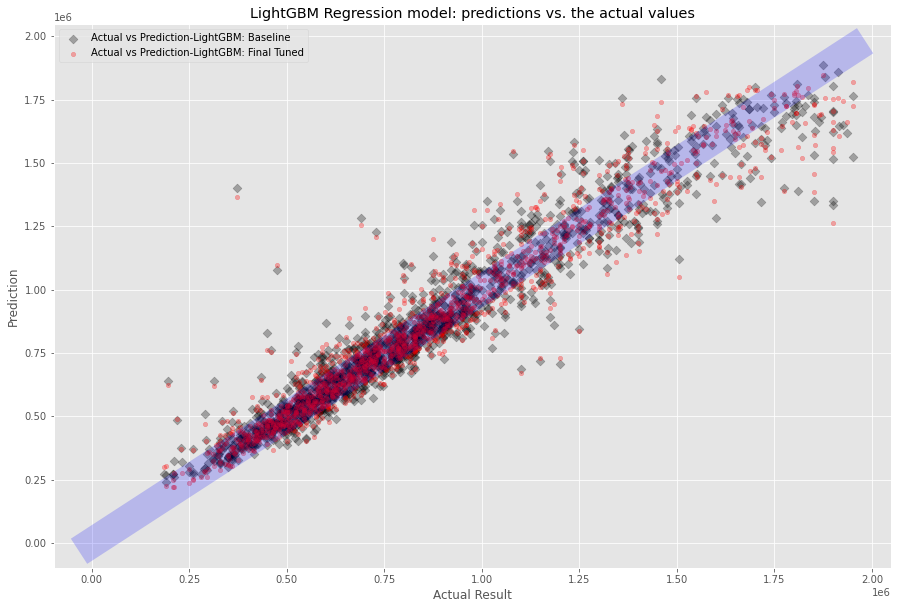

In [47]:
# Let's plot the predictions against the actual result. Use scatter()
plt.figure(figsize=(15,10))
plt.scatter(y_test,y_pred_gbm, color='black', marker='D', s=40, alpha=0.3, label='Actual vs Prediction-LightGBM: Baseline')
plt.scatter(y_test,y_pred_gbm_cv_2, color='red', marker='o', s=20, alpha=0.3,label='Actual vs Prediction-LightGBM: Final Tuned')
plt.title('LightGBM Regression model: predictions vs. the actual values')
plt.plot([0,(np.max(y_test))],[0,(np.max(y_test))], 'blue', linewidth=30, alpha=0.2)
plt.legend()
plt.xlabel('Actual Result')
plt.ylabel('Prediction')

In [48]:
final_xgb = pd.DataFrame({'SalePrice_Actual': y_test, 'SalePrice_Predicted_baseline': y_pred_gbm.round(3), 'SalePrice_Predicted_Tuned': y_pred_gbm_cv_2.round(3)})
final_xgb.head(30).sort_values(by='SalePrice_Actual', ascending=False)

,SalePrice_Actual,SalePrice_Predicted_baseline,SalePrice_Predicted_Tuned
437,1767539,1636493.012,1550245.036
253,1600000,1644236.300,1627320.811
2625,1566000,1637902.148,1571267.090
2170,1485000,1447075.412,1463468.527
1913,1463000,1377455.200,1297871.051
3237,1370000,1457240.653,1391401.896
1804,1320000,1084784.552,1061505.850
4358,1170000,1049054.766,1056943.332
1343,1005000,857349.071,903905.367
406,990000,1072261.818,1054894.063


## 10. Models next step:<a id='10_Models_next_step'></a>

Now, after building our 9th Model: LightGBM, let's see if we can further improve our prediction using below algorithm:

 * Stacking Regression.
 

## 11. Saving our Data<a id='9_Saving_our_data'></a>
Finally, let's save our final DataFrame with the new features:


In [ ]:
# Saving df_final_v1:
df_final_v1.to_csv(path_or_buf = "path" + "/pre_processing_df.csv", index=False)

In [1]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:75% !important; }</style>"))